# Imports

In [45]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import os
import matplotlib.ticker as mticks

# Load the Data

In [46]:
url = 'https://docs.google.com/spreadsheets/d/e/2PACX-1vQN3Ksa9szQuO4G1-msXWAp17KtVHQCBnuEieu_auu1wSiBf3-krHusIx5VBMkihxj-KZLBosDIGEyR/pub?output=csv'
df = pd.read_csv(url)
df.head()

,RegionID,SizeRank,RegionName,RegionType,StateName,State,Metro,CountyName,2000-01-31,2000-02-29,...,2021-12-31,2022-01-31,2022-02-28,2022-03-31,2022-04-30,2022-05-31,2022-06-30,2022-07-31,2022-08-31,2022-09-30
0,6181,0,New York,city,NY,NY,"New York-Newark-Jersey City, NY-NJ-PA",Queens County,253690.0,255517.0,...,741586.0,745686.0,750578.0,756734.0,762321.0,768797.0,773944.0,777692.0,779960.0,781622.0
1,12447,1,Los Angeles,city,CA,CA,"Los Angeles-Long Beach-Anaheim, CA",Los Angeles County,234181.0,234401.0,...,924019.0,928991.0,937936.0,953874.0,973168.0,990391.0,992337.0,992630.0,978196.0,966595.0
2,39051,2,Houston,city,TX,TX,"Houston-The Woodlands-Sugar Land, TX",Harris County,109068.0,109079.0,...,245783.0,248718.0,252080.0,256435.0,261101.0,265558.0,268901.0,271059.0,272400.0,272639.0
3,17426,3,Chicago,city,IL,IL,"Chicago-Naperville-Elgin, IL-IN-WI",Cook County,166139.0,166536.0,...,302821.0,305104.0,306404.0,308303.0,309649.0,312487.0,314663.0,315910.0,315587.0,315429.0
4,6915,4,San Antonio,city,TX,TX,"San Antonio-New Braunfels, TX",Bexar County,114794.0,114975.0,...,269323.0,274032.0,278464.0,284127.0,289739.0,294776.0,297727.0,298796.0,299124.0,298951.0


# Prepare the Dataset

## Filter 4 Largest Cities

In [47]:
top4 = df.iloc[0:4]
top4

,RegionID,SizeRank,RegionName,RegionType,StateName,State,Metro,CountyName,2000-01-31,2000-02-29,...,2021-12-31,2022-01-31,2022-02-28,2022-03-31,2022-04-30,2022-05-31,2022-06-30,2022-07-31,2022-08-31,2022-09-30
0,6181,0,New York,city,NY,NY,"New York-Newark-Jersey City, NY-NJ-PA",Queens County,253690.0,255517.0,...,741586.0,745686.0,750578.0,756734.0,762321.0,768797.0,773944.0,777692.0,779960.0,781622.0
1,12447,1,Los Angeles,city,CA,CA,"Los Angeles-Long Beach-Anaheim, CA",Los Angeles County,234181.0,234401.0,...,924019.0,928991.0,937936.0,953874.0,973168.0,990391.0,992337.0,992630.0,978196.0,966595.0
2,39051,2,Houston,city,TX,TX,"Houston-The Woodlands-Sugar Land, TX",Harris County,109068.0,109079.0,...,245783.0,248718.0,252080.0,256435.0,261101.0,265558.0,268901.0,271059.0,272400.0,272639.0
3,17426,3,Chicago,city,IL,IL,"Chicago-Naperville-Elgin, IL-IN-WI",Cook County,166139.0,166536.0,...,302821.0,305104.0,306404.0,308303.0,309649.0,312487.0,314663.0,315910.0,315587.0,315429.0


## Melt Data to Long-Form

In [48]:
top_melt = pd.melt(top4.drop(columns=['RegionID','RegionType', 'Metro',
                                     'StateName']),
                 id_vars=['SizeRank', 'RegionName', 'State', 'CountyName'],
                value_name='HomeValue',var_name="Date")
top_melt

,SizeRank,RegionName,State,CountyName,Date,HomeValue
0,0,New York,NY,Queens County,2000-01-31,253690.0
1,1,Los Angeles,CA,Los Angeles County,2000-01-31,234181.0
2,2,Houston,TX,Harris County,2000-01-31,109068.0
3,3,Chicago,IL,Cook County,2000-01-31,166139.0
4,0,New York,NY,Queens County,2000-02-29,255517.0
...,...,...,...,...,...,...
1087,3,Chicago,IL,Cook County,2022-08-31,315587.0
1088,0,New York,NY,Queens County,2022-09-30,781622.0
1089,1,Los Angeles,CA,Los Angeles County,2022-09-30,966595.0
1090,2,Houston,TX,Harris County,2022-09-30,272639.0


In [49]:
# convert 'Date' to datetime
top_melt['Date'] = pd.to_datetime(top_melt['Date'])
top_melt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1092 entries, 0 to 1091
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   SizeRank    1092 non-null   int64         
 1   RegionName  1092 non-null   object        
 2   State       1092 non-null   object        
 3   CountyName  1092 non-null   object        
 4   Date        1092 non-null   datetime64[ns]
 5   HomeValue   1087 non-null   float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(3)
memory usage: 51.3+ KB


In [50]:
# set 'Date' as index
top_melt = top_melt.set_index("Date")
top_melt

,SizeRank,RegionName,State,CountyName,HomeValue
Date,,,,,
2000-01-31,0,New York,NY,Queens County,253690.0
2000-01-31,1,Los Angeles,CA,Los Angeles County,234181.0
2000-01-31,2,Houston,TX,Harris County,109068.0
2000-01-31,3,Chicago,IL,Cook County,166139.0
2000-02-29,0,New York,NY,Queens County,255517.0
...,...,...,...,...,...
2022-08-31,3,Chicago,IL,Cook County,315587.0
2022-09-30,0,New York,NY,Queens County,781622.0
2022-09-30,1,Los Angeles,CA,Los Angeles County,966595.0


## Resample to Monthly Frequency

In [51]:
top_ts = top_melt.groupby('RegionName').resample("MS").sum()
top_ts

C:\Users\joshl\AppData\Local\Temp\ipykernel_10544\1637863341.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  top_ts = top_melt.groupby('RegionName').resample("MS").sum()


SizeRank  HomeValue
RegionName Date                           
Chicago    2000-01-01         3   166139.0
           2000-02-01         3   166536.0
           2000-03-01         3   167368.0
           2000-04-01         3   168826.0
           2000-05-01         3   170499.0
...                         ...        ...
New York   2022-05-01         0   768797.0
           2022-06-01         0   773944.0
           2022-07-01         0   777692.0
           2022-08-01         0   779960.0
           2022-09-01         0   781622.0

[1092 rows x 2 columns]

# Plotting Home Values

In [52]:
unstacked = top_ts.unstack(level=0)
unstacked

SizeRank                              HomeValue            \
RegionName  Chicago Houston Los Angeles New York   Chicago   Houston   
Date                                                                   
2000-01-01        3       2           1        0  166139.0  109068.0   
2000-02-01        3       2           1        0  166536.0  109079.0   
2000-03-01        3       2           1        0  167368.0  108878.0   
2000-04-01        3       2           1        0  168826.0  108881.0   
2000-05-01        3       2           1        0  170499.0  108834.0   
...             ...     ...         ...      ...       ...       ...   
2022-05-01        3       2           1        0  312487.0  265558.0   
2022-06-01        3       2           1        0  314663.0  268901.0   
2022-07-01        3       2           1        0  315910.0  271059.0   
2022-08-01        3       2           1        0  315587.0  272400.0   
2022-09-01        3       2           1        0  315429.0  272639.0   

                                  
RegionName Los Angeles  New York  
Date                              
2000-01-01    234181.0  253690.0  
2000-02-01    234401.0  255517.0  
2000-03-01    235513.0  257207.0  
2000-04-01    237589.0  260310.0  
2000-05-01    240113.0  263204.0  
...                ...       ...  
2022-05-01    990391.0  768797.0  
2022-06-01    992337.0  773944.0  
2022-07-01    992630.0  777692.0  
2022-08-01    978196.0  779960.0  
2022-09-01    966595.0  781622.0  

[273 rows x 8 columns]

In [53]:
unstacked.columns

MultiIndex([( 'SizeRank',     'Chicago'),
            ( 'SizeRank',     'Houston'),
            ( 'SizeRank', 'Los Angeles'),
            ( 'SizeRank',    'New York'),
            ('HomeValue',     'Chicago'),
            ('HomeValue',     'Houston'),
            ('HomeValue', 'Los Angeles'),
            ('HomeValue',    'New York')],
           names=[None, 'RegionName'])

In [54]:
unstacked.isna().sum()

           RegionName 
SizeRank   Chicago        0
           Houston        0
           Los Angeles    0
           New York       0
HomeValue  Chicago        0
           Houston        0
           Los Angeles    0
           New York       0
dtype: int64

## Using Funcformatter

In [55]:
def thousands(x,pos):
    """function for use wth matplotlib FuncFormatter -  formats money in millions"""
    new_x = x/1_000
    return f"{new_x:,.0f}K"
# creating the formatter
fmt_thous = mticks.FuncFormatter(thousands)

## Final Visual

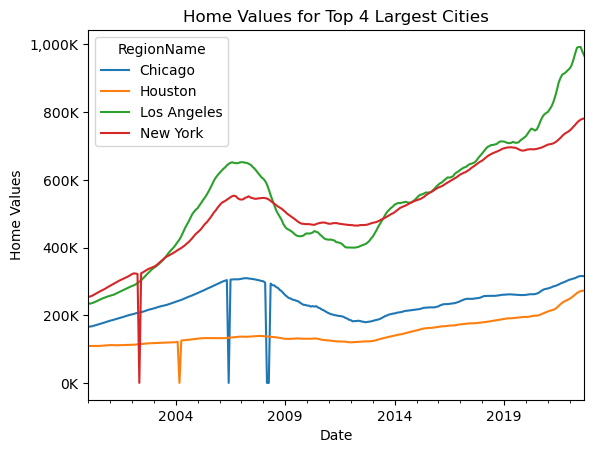

In [56]:
ax = unstacked['HomeValue'].plot()
ax.set(title='Home Values for Top 4 Largest Cities', ylabel='Home Values')
ax.yaxis.set_major_formatter(fmt_thous)

# Questions

## 1) Which City had the highest Typical Home Value at the end of 2008? Which had the least?

In [57]:
top_ts.loc[pd.IndexSlice[:,'2008-12-01'],:]

,,SizeRank,HomeValue
RegionName,Date,,
Chicago,2008-12-01,3,265306.0
Houston,2008-12-01,2,131283.0
Los Angeles,2008-12-01,1,469294.0
New York,2008-12-01,0,510309.0


- New York had the highest home value at the end of 2008.

## 2) How much did the home values change from November 2008 to December 2008 (in dollars)?

In [62]:
ts_diff = top_ts.loc[pd.IndexSlice[:,'2008-11-01':'2008-12-01'],:]
ts_diff

SizeRank  HomeValue
RegionName  Date                           
Chicago     2008-11-01         3   271059.0
            2008-12-01         3   265306.0
Houston     2008-11-01         2   132247.0
            2008-12-01         2   131283.0
Los Angeles 2008-11-01         1   481905.0
            2008-12-01         1   469294.0
New York    2008-11-01         0   514767.0
            2008-12-01         0   510309.0

In [63]:
top_diff = ts_diff.diff()
top_diff

SizeRank  HomeValue
RegionName  Date                           
Chicago     2008-11-01       NaN        NaN
            2008-12-01       0.0    -5753.0
Houston     2008-11-01      -1.0  -133059.0
            2008-12-01       0.0     -964.0
Los Angeles 2008-11-01      -1.0   350622.0
            2008-12-01       0.0   -12611.0
New York    2008-11-01      -1.0    45473.0
            2008-12-01       0.0    -4458.0

- Chicago: Home values dropped 5743 dollars
- Houston: Home values dropped 964 dollars
- LA: Home values dropped 12,611 dollars
- New York: Home values dropped 4,458 dollars